<h2>Alkutoimet</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Kaavioiden tyyliasetus (ei ole pakollinen)
plt.style.use('seaborn-whitegrid')

In [2]:
# Tiedostojen avaaminen
elisa = pd.read_csv('http://taanila.fi/elisa.csv', 
                    sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', 
                    sep = ';', decimal = ',', skiprows=1)

elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2020-03-10,48.87,48.91,50.80,51.54,48.76,48.82,49.810,899116,44793130.36,7079,NaN
1,2020-03-09,50.98,51.06,50.26,52.24,50.04,50.80,51.043,1268728,64760593.89,7516,NaN
2,2020-03-06,53.08,53.14,54.36,54.94,52.48,52.96,53.260,691856,36781315.74,4658,NaN
3,2020-03-05,55.32,55.34,55.56,55.90,55.02,55.30,55.342,493249,27296285.31,3663,NaN
4,2020-03-04,55.06,55.10,54.66,55.72,54.44,55.08,55.125,595185,32809404.64,4613,NaN


In [3]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2020-03-10,3.373,3.376,3.435,3.527,3.336,3.354,3.437,3059155,10512558.52,3328,NaN
1,2020-03-09,3.422,3.427,3.450,3.560,3.401,3.402,3.454,4124414,14244047.72,4847,NaN
2,2020-03-06,3.650,3.653,3.660,3.710,3.604,3.636,3.650,2644145,9650775.29,2537,NaN
3,2020-03-05,3.710,3.715,3.800,3.813,3.683,3.714,3.733,1406270,5248835.68,1567,NaN
4,2020-03-04,3.766,3.769,3.683,3.783,3.683,3.775,3.754,1550226,5819122.98,1520,NaN


In [4]:
# Aikaleimat indeksiin
elisa.index = pd.to_datetime(elisa['Date'])
telia.index = pd.to_datetime(telia['Date'])

# Järjestys vanhimmasta uusimpaan
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)

telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2015-01-02,2015-01-02,5.300,5.305,5.34,5.36,5.285,5.305,5.308,1039894,5519434.117,792,NaN
2015-01-05,2015-01-05,5.205,5.215,5.29,5.30,5.205,5.205,5.248,929121,4876272.285,915,NaN
2015-01-07,2015-01-07,5.230,5.245,5.24,5.30,5.220,5.245,5.269,860595,4532003.330,621,NaN
2015-01-08,2015-01-08,5.405,5.410,5.26,5.41,5.260,5.405,5.329,1001285,5335848.695,684,NaN
2015-01-09,2015-01-09,5.290,5.295,5.40,5.42,5.290,5.295,5.354,917754,4913679.525,679,NaN


<h2>Viivakaavioita</h2>

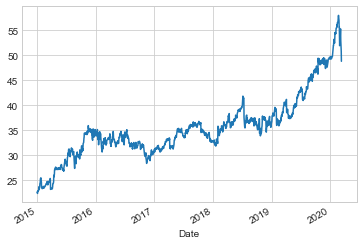

In [5]:
elisa['Closing price'].plot()

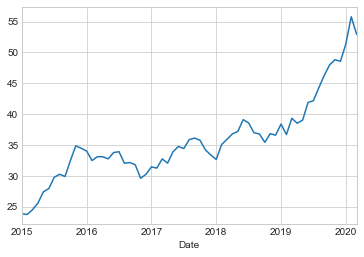

In [6]:
# Kuukausittaiset keskiarvohinnat
elisa['Closing price'].resample('M').mean().plot()

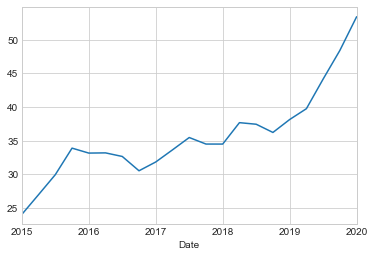

In [7]:
# Vuosineljännesten keskiarvohinnat
elisa['Closing price'].resample('Q').mean().plot()

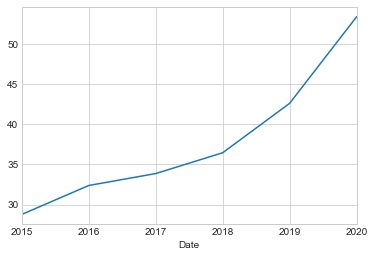

In [8]:
# Vuosien keskiarvohinnat
elisa['Closing price'].resample('Y').mean().plot()

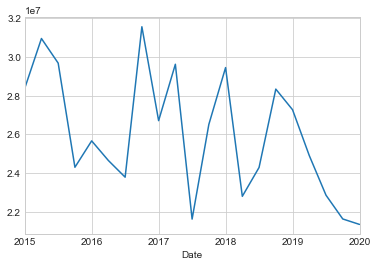

In [9]:
# Vaihto osakkeiden lukumääränä vuosineljänneksittäin
elisa['Total volume'].resample('Q').sum().plot()

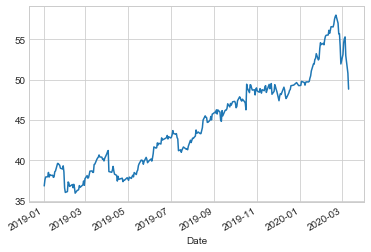

In [10]:
# Vuoden 2020 alusta
ax1 = elisa['Closing price']['2019':].plot()

<h2>Liukuvia keskiarvoja</h2>

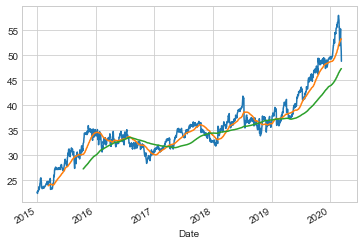

In [11]:
elisa['Closing price'].plot()

# Liukuvia keskiarvoja
elisa['Closing price'].rolling(50).mean().plot()
elisa['Closing price'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

In [12]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Closing price'].pct_change()
telia['Telia%'] = telia['Closing price'].pct_change()

In [13]:
# Elisan ja Telian prosenttimuutokset samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)
muutokset.head()

,Elisa%,Telia%
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.012346,-0.018850
2015-01-07,0.023214,0.007685
2015-01-08,-0.003927,0.030505
2015-01-09,0.001314,-0.020352


Text(0, 0.5, 'Muutos')

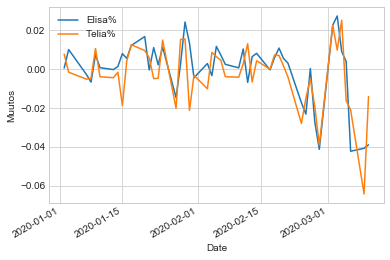

In [14]:
# Muutokset vuoden alusta
ax2 = muutokset['2020':].plot()

ax2.set_ylabel('Muutos')

In [15]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1302.000000,1302.000000
mean,0.000687,-0.000266
std,0.013982,0.013096
min,-0.092226,-0.079728
25%,-0.005984,-0.006874
50%,0.000881,-0.000496
75%,0.007757,0.007201
max,0.068757,0.083107


In [16]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%'])>0.05) | 
          (abs(muutokset['Telia%'])>0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [17]:
# Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,259.0,0.001428,0.013306,-0.055172,-0.004625,0.000951,0.007842,0.057805
1,263.0,0.000601,0.012752,-0.038976,-0.006939,0.000462,0.007246,0.065693
2,264.0,0.000787,0.012347,-0.053899,-0.005280,0.000482,0.007803,0.058061
3,261.0,0.000708,0.015189,-0.074751,-0.006686,0.001081,0.008177,0.068757
4,255.0,-0.000100,0.016079,-0.092226,-0.006152,0.001158,0.007687,0.061796


In [18]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,259.0,-0.000685,0.014458,-0.079728,-0.007013,-0.001045,0.007280,0.039216
1,263.0,-0.000010,0.011936,-0.037550,-0.006573,-0.000855,0.006542,0.048600
2,264.0,0.000088,0.011471,-0.044934,-0.005954,-0.000492,0.007222,0.042407
3,261.0,-0.000930,0.013584,-0.066554,-0.007843,0.000000,0.006951,0.039604
4,255.0,0.000208,0.013893,-0.050542,-0.006978,0.000460,0.007647,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [19]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis=1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.469798
Telia%,0.469798,1.000000


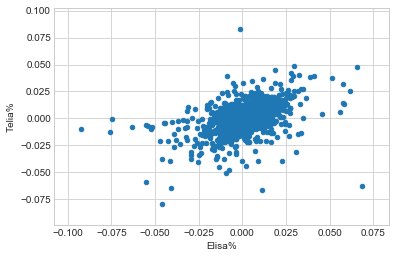

In [20]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x='Elisa%', y='Telia%')

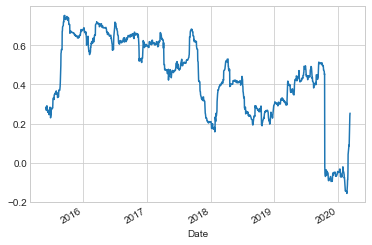

In [21]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina:
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

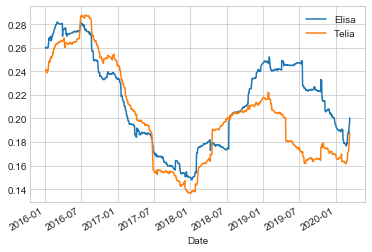

In [22]:
# Volatiliteetti kertoo osakkeeseen sisältyvästä riskistä
# Seuraavasta selviää, miten riski on vaihdellut ajan kuluessa
(muutokset['Elisa%'].rolling(252).std()*(252**0.5)).plot(label='Elisa', legend=True)
(muutokset['Telia%'].rolling(252).std()*(252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

(3, 7)

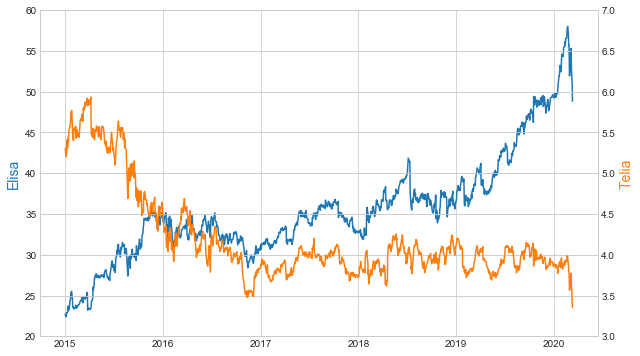

In [23]:
# Luon figure- ja axes-oliot
fig, ax = plt.subplots(figsize = (10, 6))

# Määritän ax1-olion
ax.set_ylabel('Elisa', color='C0', fontsize=14)
ax.plot(elisa['Closing price'], color='C0')
ax.set_ylim(20,60)

# Luon Telialle toisen axes-olion, jolla on yhteinen x-akseli ax-olion kanssa
ax_T = ax.twinx()

ax_T.set_ylabel('Telia', color='C1', fontsize=14)
ax_T.plot(telia['Closing price'], color='C1')
ax_T.set_ylim(3,7)